![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [59]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

Highset crime hour is 12:00  with 13663 crimes


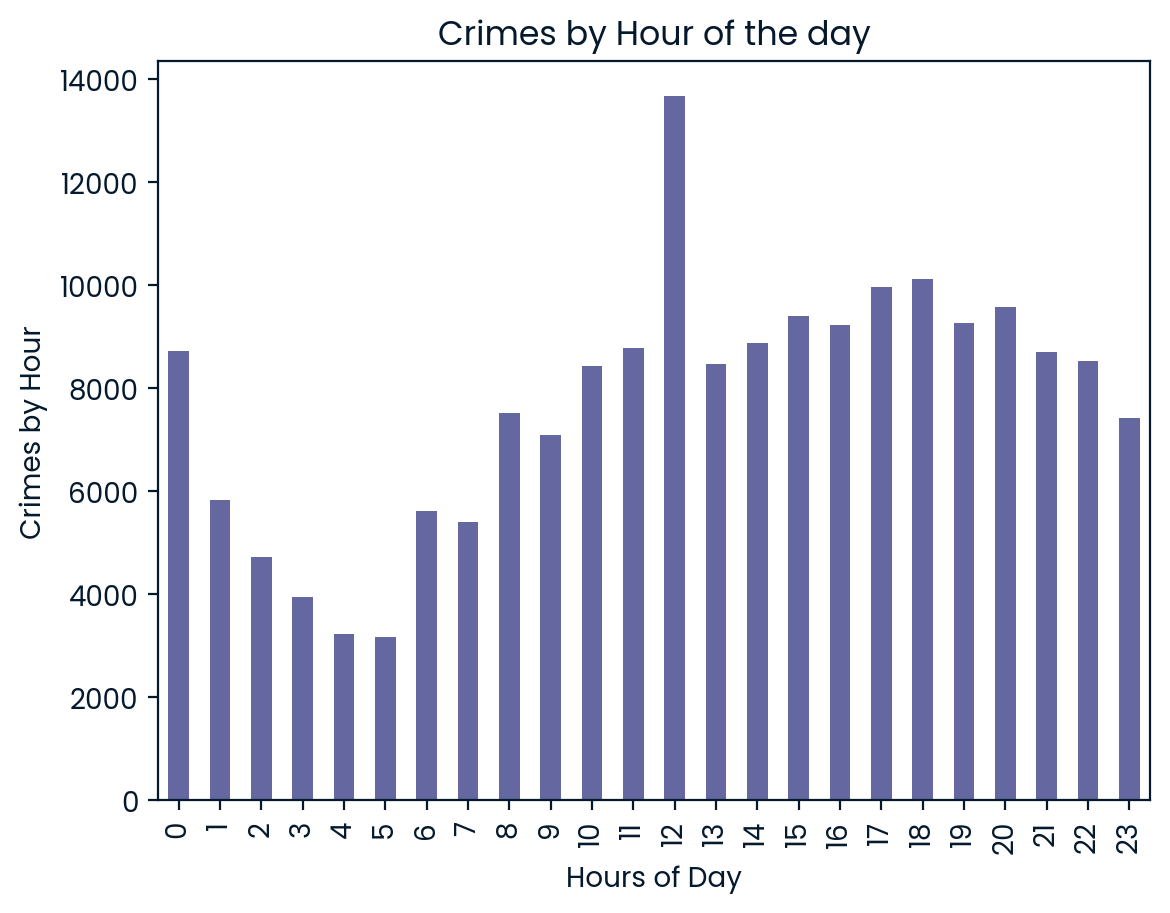

THe largest frequency of night crimes is Central with 3312 crimes


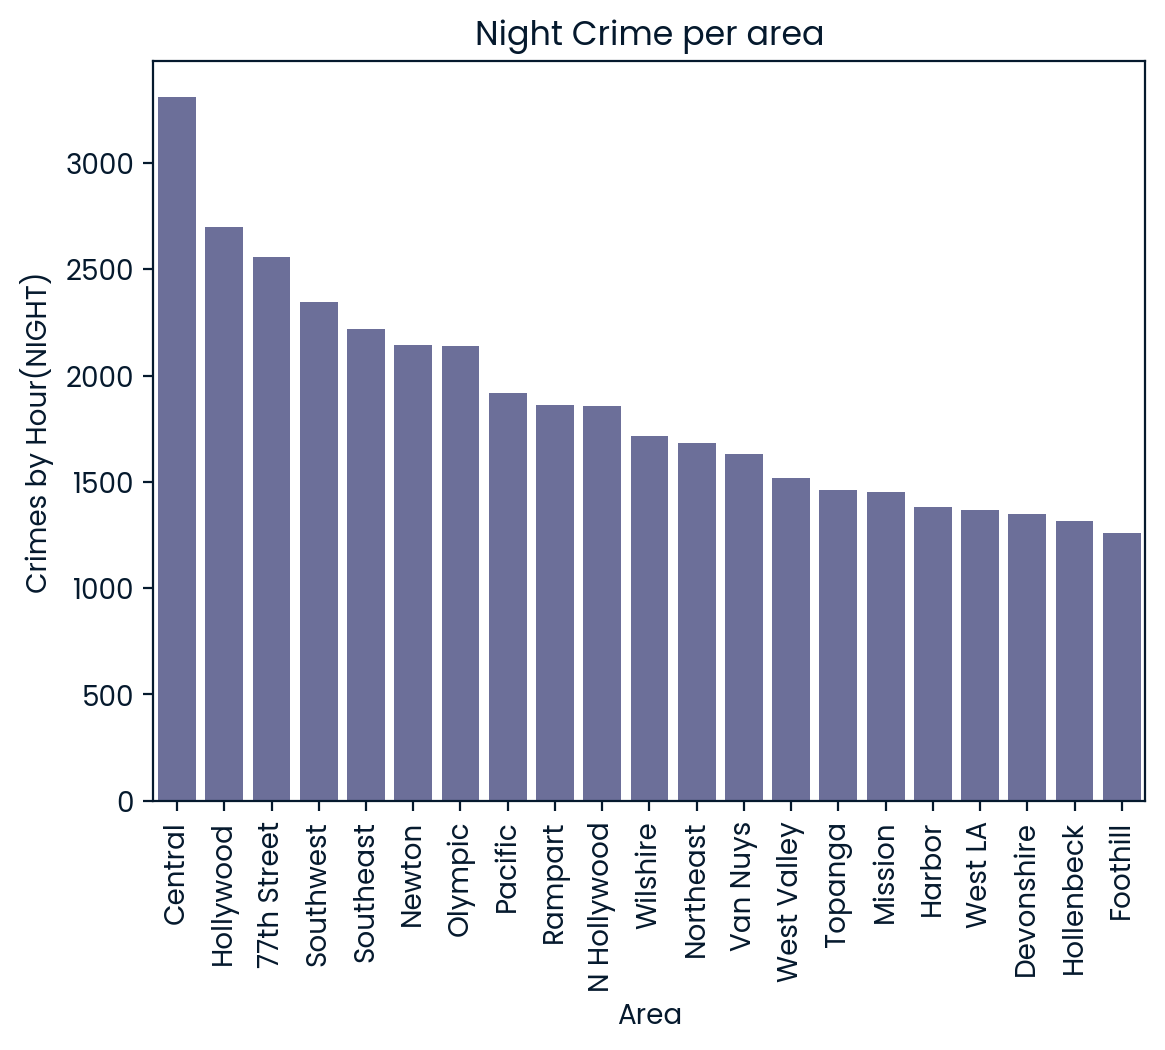

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: age_group, dtype: int64


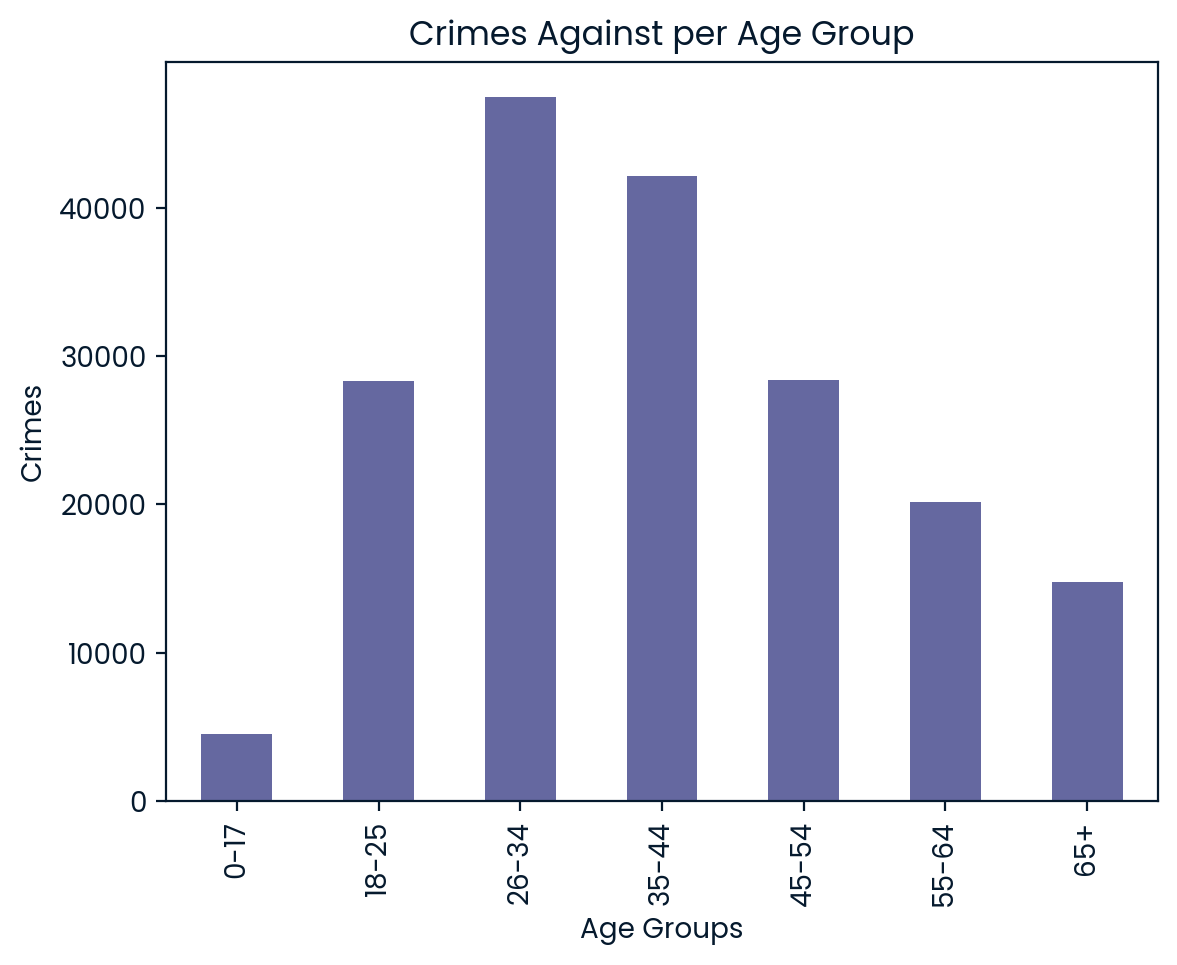

In [60]:
#Question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})

#ensuring data is in proper format (0000) 
crimes['TIME OCC'] = crimes['TIME OCC'].str.zfill(4)

#hour extraction from the clean column by taking the first 2 numbers
crimes['HOUR'] = crimes['TIME OCC'].str[:2].astype(int)

#counts the amount of times an HOUR is repeated and sorts it 
hour_counts = crimes['HOUR'].value_counts().sort_index()

#returns the highest count using idxmax()
peak_crime_hour = hour_counts.idxmax()
print(f"Highset crime hour is {peak_hour}:00  with {hour_counts.max()} crimes")


#visualizing with barplot
hour_counts.plot(kind='bar')
plt.title("Crimes by Hour of the day")
plt.xlabel("Hours of Day")
plt.ylabel("Crimes by Hour")
plt.show()

#___________________________________________________________________________________________
#Question 2

#converting to int so we can create a boolean
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)
#filerting for hours
crimes['NIGHT TIME'] = (crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] <= 359)
#grouping by the new filture and areas
night_time = crimes[crimes['NIGHT TIME']].groupby('AREA NAME').size()
#setting the area by highest crime into a variable 
peak_night_crime_location = night_time.idxmax()
#printing the variable
print(f"THe largest frequency of night crimes is {peak_night_crime_location} with {night_time.max()} crimes")

#visualization
night_time_df = night_time.reset_index()
night_time_df.columns = ['Area', 'Crimes'] 

q2_order = night_time_df.sort_values('Crimes', ascending=False)['Area']
sns.barplot(data=night_time_df, x='Area', y='Crimes', order=q2_order)
plt.title('Night Crime per area')
plt.xlabel('Area')
plt.xticks(rotation=90)
plt.ylabel('Crimes by Hour(NIGHT)')
plt.show()


#____________________________________________________________________________________________
#Question 3
#defining bins
bins = [0, 18, 26, 35, 45, 55, 65, float('inf')]
#setting up labels for pd.cut
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["age_group"] = pd.cut(crimes["Vict Age"], bins=bins, labels=labels, right=False)

victim_ages = crimes["age_group"].value_counts().reindex(labels)

print(victim_ages)

victim_ages.plot(kind='bar')
plt.title('Crimes Against per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Crimes')
plt.show()